## Portfolio Optimization


In [1]:
from datetime import date
today = date.today()

In [163]:
#stock = ['SPY', 'GLD', 'AAPL', 'MSFT']
stock = ['SPY', 'GLD', 'SPLB', 'EEM', 'QQQ', 'SLV', 'HYG', 'VWO', 'TLT', 'FXI']
#stock = ['NVDA', 'LB', 'AMZN', 'JNJ', 'JPM']
sampling = ['daily', 'weekly'][0]
aggregation = ['last_day', 'mean'][0]
#stock = ['VTI', 'VEU', 'VNQ', 'BND', 'GSG']
date_start = '2010-01-01'
date_end = today.strftime("%Y-%m-%d")

In [164]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas_datareader as pdr
import statsmodels.api as sm
import scipy.stats as scs

In [165]:
def print_statistics(array):
    ''' Prints selected statistics.
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    sta = scs.describe(array)
    print('%14s %15s' % ('statistic', 'value'))
    print(30 * '-')
    print('%14s %15.5f' % ('size', sta[0]))
    print('%14s %15.5f' % ('min', sta[1][0]))
    print('%14s %15.5f' % ('max', sta[1][1]))
    print('%14s %15.5f' % ('mean', sta[2]))
    print('%14s %15.5f' % ('std', np.sqrt(sta[3])))
    print('%14s %15.5f' % ('skew', sta[4]))
    print('%14s %15.5f' % ('kurtosis', sta[5]))

In [166]:
def normality_tests(arr):
    ''' Tests for normality distribution of given data set.
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    print('Skew of data set  %14.3f' % scs.skew(arr))
    print('Skew test p-value %14.3f' % scs.skewtest(arr)[1])
    print('Kurt of data set  %14.3f' % scs.kurtosis(arr))
    print('Kurt test p-value %14.3f' % scs.kurtosistest(arr)[1])
    print('Norm test p-value %14.3f' % scs.normaltest(arr)[1])

In [167]:
combined_data = []
for i in range(len(stock)):
    df = pdr.DataReader(stock[i], 
                       start=date_start, 
                       end=date_end, 
                       data_source='yahoo')
    name = stock[i]
    df_stock = df[['Adj Close']]
    df_stock = df_stock.rename(columns={"Adj Close" : name})
    if i > 0:
        combined_data = pd.concat([combined_data, df_stock], axis = 1)
    else:
        combined_data = df_stock
        
    
    #combined_data.append(df_stock)
    #combined_data.append(df_stock)
    #combined_data = pd.concat([combined_data, df_stock], axis=1, join="inner" )
    #df1.append(df4, ignore_index=True, sort=False)
    #result = pd.concat([df1, df4], axis=1, join="inner")
if sampling == 'weekly':
    if aggregation == 'last_day':
        combined_data = combined_data.resample('W').agg('last')
    elif aggregation == "mean":
        combined_data = combined_data.resample('W').agg('mean')

In [168]:
combined_data

,SPY,GLD,SPLB,EEM,QQQ,SLV,HYG,VWO,TLT,FXI
Date,,,,,,,,,,
2010-01-04,91.087418,109.800003,14.116012,34.109280,41.570904,17.230000,46.122734,32.018757,66.381310,32.816116
2010-01-05,91.328552,109.699997,14.287138,34.356842,41.570904,17.510000,46.341541,32.124477,66.809990,33.493130
2010-01-06,91.392838,111.510002,14.175710,34.428719,41.320183,17.860001,46.461365,32.320812,65.915627,33.896294
2010-01-07,91.778671,110.820000,14.175710,34.229061,41.347046,17.889999,46.648941,32.041389,66.026482,33.371418
2010-01-08,92.084045,111.370003,14.163770,34.500587,41.687347,18.150000,46.721859,32.237755,65.996956,33.470306
...,...,...,...,...,...,...,...,...,...,...
2021-01-12,378.769989,174.119995,32.070000,54.500000,313.920013,23.719999,87.010002,52.419998,150.949997,48.290001
2021-01-13,379.790009,173.369995,32.509998,54.619999,316.040009,23.440001,87.269997,52.590000,152.649994,48.430000
2021-01-14,378.459991,173.279999,32.270000,55.130001,314.350006,23.709999,87.250000,53.110001,151.220001,48.650002


<AxesSubplot:xlabel='Date'>

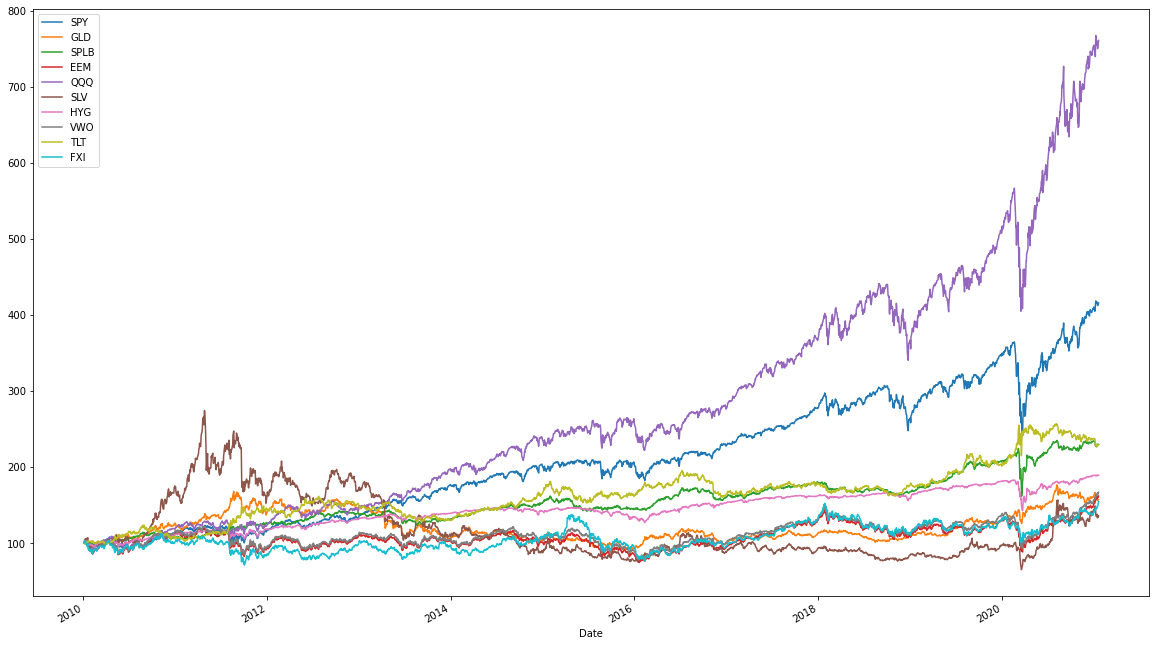

In [169]:
(combined_data / combined_data.iloc[0] * 100).plot(figsize=(20, 12))

In [170]:
log_returns = np.log(combined_data / combined_data.shift(1))
log_returns.head()

,SPY,GLD,SPLB,EEM,QQQ,SLV,HYG,VWO,TLT,FXI
Date,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.002644,-0.000911,0.012050,0.007232,0.000000,0.016120,0.004733,0.003296,0.006437,0.020421
2010-01-06,0.000704,0.016365,-0.007830,0.002090,-0.006049,0.019791,0.002582,0.006093,-0.013477,0.011965
2010-01-07,0.004213,-0.006207,0.000000,-0.005816,0.000650,0.001678,0.004029,-0.008683,0.001680,-0.015606
2010-01-08,0.003322,0.004951,-0.000843,0.007901,0.008197,0.014429,0.001562,0.006110,-0.000447,0.002959


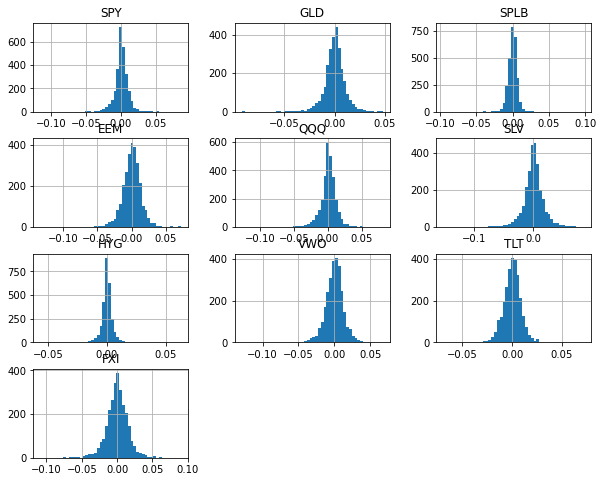

In [171]:
log_returns.hist(bins=50, figsize=(10, 8));

In [172]:
for sym in stock:
    print('\nResults for symbol {}'.format(sym))
    print(30 * '-')
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)  


Results for symbol SPY
------------------------------
     statistic           value
------------------------------
          size      2779.00000
           min        -0.11589
           max         0.08673
          mean         0.00051
           std         0.01090
          skew        -0.86357
      kurtosis        14.36124

Results for symbol GLD
------------------------------
     statistic           value
------------------------------
          size      2779.00000
           min        -0.09191
           max         0.04787
          mean         0.00016
           std         0.01006
          skew        -0.58732
      kurtosis         5.58104

Results for symbol SPLB
------------------------------
     statistic           value
------------------------------
          size      2779.00000
           min        -0.09538
           max         0.09891
          mean         0.00030
           std         0.00735
          skew        -0.07343
      kurtosis        40.060

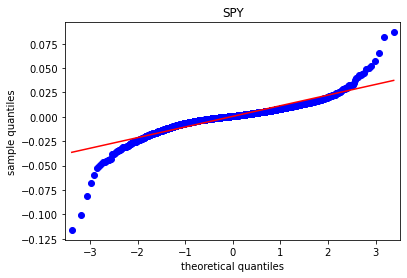

In [173]:
sm.qqplot(log_returns[stock[0]].dropna(), line='s')
plt.title(str(stock[0]))
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

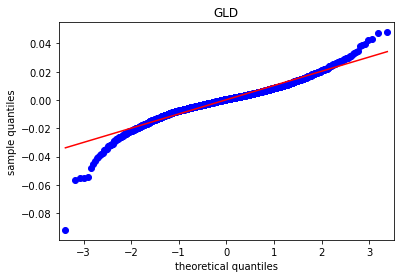

In [174]:
sm.qqplot(log_returns[stock[1]].dropna(), line='s')
plt.title(str(stock[1]))
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

In [175]:
for sym in stock:
    print('\nResults for symbol {}'.format(sym))
    print(32 * '-')
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data) 


Results for symbol SPY
--------------------------------
Skew of data set          -0.864
Skew test p-value          0.000
Kurt of data set          14.361
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol GLD
--------------------------------
Skew of data set          -0.587
Skew test p-value          0.000
Kurt of data set           5.581
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol SPLB
--------------------------------
Skew of data set          -0.073
Skew test p-value          0.114
Kurt of data set          40.060
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol EEM
--------------------------------
Skew of data set          -0.685
Skew test p-value          0.000
Kurt of data set           7.001
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol QQQ
--------------------------------
Skew of data set          -0.666
Skew test p-value    

In [176]:
noa = len(stock) 

In [177]:
rets = log_returns

In [178]:
if sampling == 'weekly':
    print(rets.mean() * 52)
else:
    print(rets.mean() * 252 )


SPY     0.129200
GLD     0.041006
SPLB    0.075453
EEM     0.043735
QQQ     0.184048
SLV     0.027678
HYG     0.057920
VWO     0.046467
TLT     0.075310
FXI     0.039464
dtype: float64


In [179]:
if sampling == 'weekly':
    print(rets.cov() * 52)
else:
    print(rets.cov() * 252)

           SPY       GLD      SPLB       EEM       QQQ       SLV       HYG  \
SPY   0.029935  0.000563 -0.000219  0.032310  0.031646  0.010757  0.011591   
GLD   0.000563  0.025497  0.003883  0.004835  0.000735  0.037280  0.001125   
SPLB -0.000219  0.003883  0.013612  0.000104 -0.000233  0.004060  0.001728   
EEM   0.032310  0.004835  0.000104  0.051242  0.034328  0.020779  0.013921   
QQQ   0.031646  0.000735 -0.000233  0.034328  0.038870  0.011127  0.011641   
SLV   0.010757  0.037280  0.004060  0.020779  0.011127  0.086495  0.005810   
HYG   0.011591  0.001125  0.001728  0.013921  0.011641  0.005810  0.007497   
VWO   0.031152  0.004742  0.000147  0.049227  0.033058  0.020173  0.013441   
TLT  -0.011978  0.004812  0.011303 -0.012707 -0.011692  0.000986 -0.004023   
FXI   0.029815  0.003033 -0.001128  0.049488  0.032468  0.017510  0.012420   

           VWO       TLT       FXI  
SPY   0.031152 -0.011978  0.029815  
GLD   0.004742  0.004812  0.003033  
SPLB  0.000147  0.011303 -0.00

### The Basic Theory

In [180]:
weights = np.random.random(noa)  
weights /= np.sum(weights)  

In [181]:
weights

array([0.05367359, 0.01898977, 0.11550404, 0.08956482, 0.22370407,
       0.13631427, 0.08260112, 0.05321181, 0.11932348, 0.10711301])

In [182]:
weights.sum()

0.9999999999999999

In [183]:
if sampling == 'weekly':
    print(np.sum(rets.mean() * weights) * 52)
else:
    print(np.sum(rets.mean() * weights) * 252)

0.08576103260206817


In [184]:
if sampling == 'weekly':
    print(np.dot(weights.T, np.dot(rets.cov() * 52, weights))  )
else:
    print(np.dot(weights.T, np.dot(rets.cov() * 252, weights))  )

0.015186467584856783


In [185]:
if sampling == 'weekly':
    print(math.sqrt(np.dot(weights.T, np.dot(rets.cov() * 52, weights)))  )
else:
    print(math.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights))))

0.12323338664849223


In [186]:
def port_ret(weights):
    if sampling == 'weekly':
        return np.sum(rets.mean() * weights) * 52
    else:
        return np.sum(rets.mean() * weights) * 252    

In [187]:
def port_vol(weights):
    if sampling == 'weekly':
        return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 52, weights)))
    else:
        return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))    

In [188]:
prets = []
pvols = []
for p in range (25000):  
    weights = np.random.random(noa)  
    weights /= np.sum(weights)  
    prets.append(port_ret(weights))  
    pvols.append(port_vol(weights))  
prets = np.array(prets)
pvols = np.array(pvols)

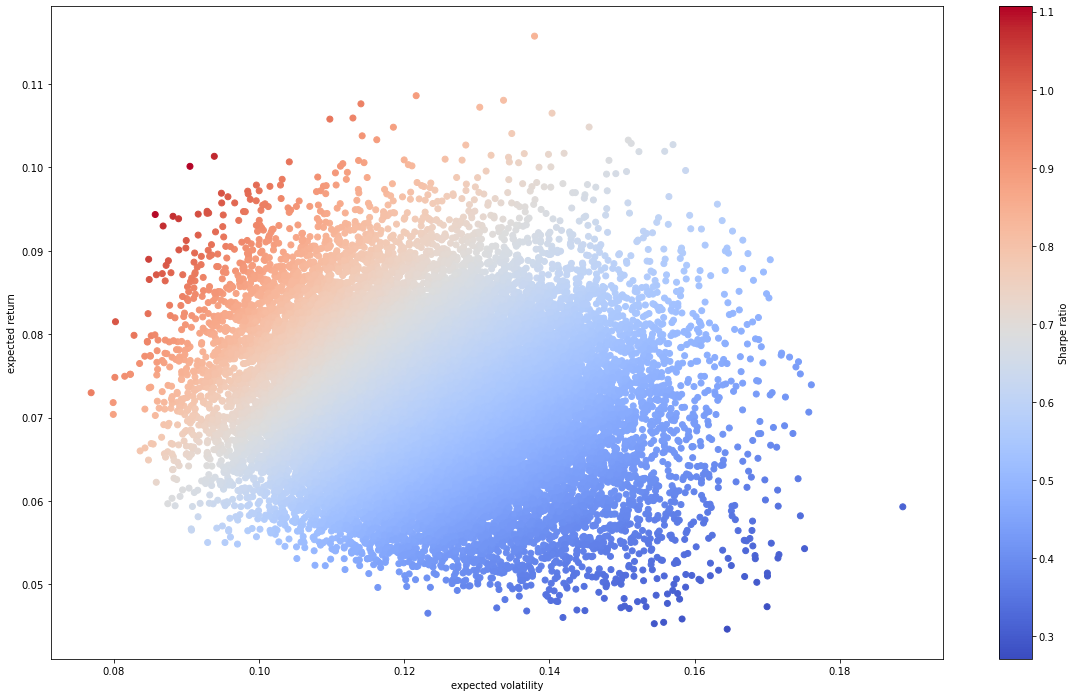

In [189]:
plt.figure(figsize=(20, 12))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');

### Portfolio Optimizations

First maximise the Sharpe Ratio

In [190]:
import scipy.optimize as sco

In [191]:
def min_func_sharpe(weights):  
    return -port_ret(weights) / port_vol(weights)  

In [192]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  

In [193]:
bnds = tuple((0, 1) for x in range(noa))  

In [194]:
eweights = np.array(noa * [1. / noa,])  
eweights 

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [195]:
min_func_sharpe(eweights)

-0.5985172980712906

In [196]:
%%time
opts = sco.minimize(min_func_sharpe, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons, tol = 10**-3, options={'maxiter': 100000}) 

Wall time: 92.1 ms


In [197]:
opts  

     fun: -1.355661152190292
     jac: array([ 0.04584293,  0.01441061,  0.11126243,  1.19643359, -0.02289596,
        0.68946618, -0.01164494,  1.09182449,  0.02231419,  1.05466852])
 message: 'Optimization terminated successfully'
    nfev: 67
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.00000000e+00, 0.00000000e+00, 1.49938706e-15, 0.00000000e+00,
       4.17770240e-01, 0.00000000e+00, 1.00906998e-01, 0.00000000e+00,
       4.81322762e-01, 0.00000000e+00])

In [198]:
opts['x'].round(3)  

array([0.   , 0.   , 0.   , 0.   , 0.418, 0.   , 0.101, 0.   , 0.481,
       0.   ])

In [199]:
port_ret(opts['x']).round(3) 

0.119

In [200]:
port_vol(opts['x']).round(3) 

0.088

Maximum Sharpe Ratio:

In [201]:
port_ret(opts['x']) / port_vol(opts['x'])  

1.355661152190292

Now, minimise the variance

In [202]:
optv = sco.minimize(port_vol, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons) 

In [203]:
optv

     fun: 0.061603384068094166
     jac: array([0.06755873, 0.06120325, 0.07456988, 0.093318  , 0.06959188,
       0.10548058, 0.06170679, 0.08969844, 0.06145928, 0.07408509])
 message: 'Optimization terminated successfully'
    nfev: 132
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([0.00000000e+00, 6.54823496e-02, 1.77783486e-17, 1.03530346e-17,
       0.00000000e+00, 1.89467517e-18, 6.49949103e-01, 0.00000000e+00,
       2.84568548e-01, 0.00000000e+00])

In [204]:
optv['x'].round(3)

array([0.   , 0.065, 0.   , 0.   , 0.   , 0.   , 0.65 , 0.   , 0.285,
       0.   ])

In [205]:
port_vol(optv['x']).round(3)

0.062

In [206]:
port_ret(optv['x']).round(3)

0.062

Best Sharpe ratio with minimum volatility:

In [207]:
port_ret(optv['x']) / port_vol(optv['x'])

1.002562099099227

### Efficient Frontier

In [208]:
cons = ({'type': 'eq', 'fun': lambda x:  port_ret(x) - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  

In [209]:
bnds = tuple((0, 1) for x in weights)

Nelder-Mead’ (see here)

‘Powell’ (see here)

‘CG’ (see here)

‘BFGS’ (see here)

‘Newton-CG’ (see here)

‘L-BFGS-B’ (see here)

‘TNC’ (see here)

‘COBYLA’ (see here)

‘SLSQP’ (see here)

‘trust-constr’(see here)

‘dogleg’ (see here)

‘trust-ncg’ (see here)

‘trust-exact’ (see here)

‘trust-krylov’ (see here)

In [210]:
%%time
trets = np.linspace(0.05, 0.2, 50)
tvols = []
for tret in trets:
    res = sco.minimize(port_vol, eweights, method='SLSQP',
                       bounds=bnds, constraints=cons)  
    tvols.append(res['fun'])
tvols = np.array(tvols)

Wall time: 7.23 s


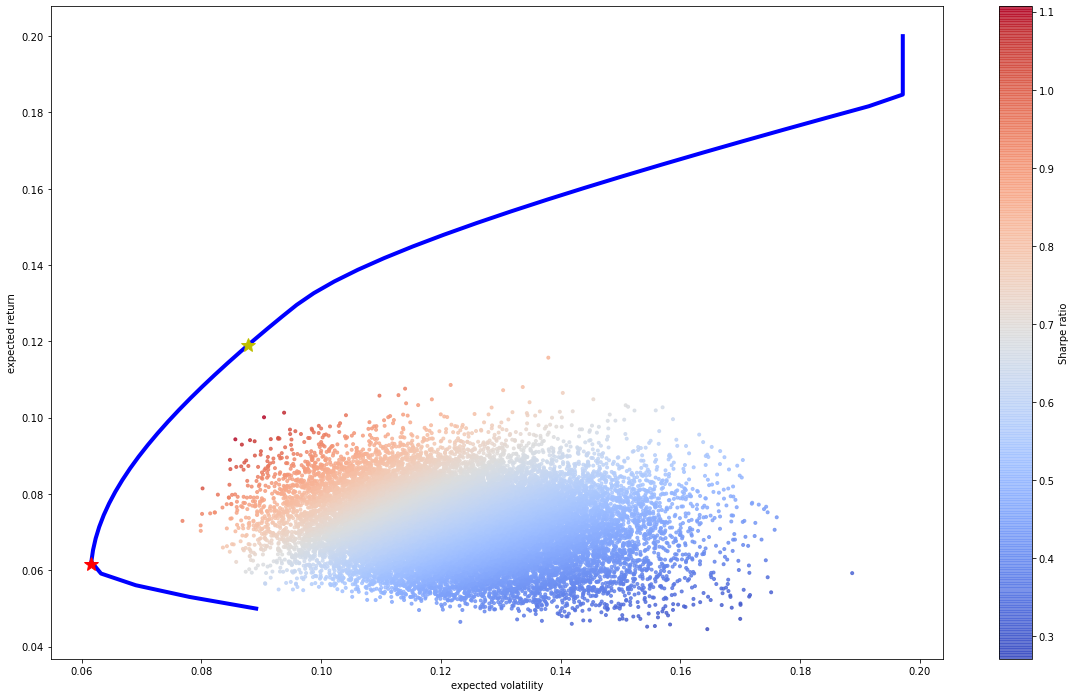

In [211]:
plt.figure(figsize=(20, 12))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)
plt.plot(port_vol(opts['x']), port_ret(opts['x']),
         'y*', markersize=15.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']),
         'r*', markersize=15.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

### Capital Market Line

In [212]:
import scipy.interpolate as sci

In [213]:
ind = np.argmin(tvols)  
evols = tvols[ind:]  
erets = trets[ind:]  

In [214]:
tck = sci.splrep(np.sort(evols), np.sort(erets))  

In [215]:
def f(x):
    ''' Efficient frontier function (splines approximation). '''
    return sci.splev(x, tck, der=0)
def df(x):
    ''' First derivative of efficient frontier function. '''
    return sci.splev(x, tck, der=1)

In [216]:
def equations(p, rf=0.01):
    eq1 = rf - p[0]  
    eq2 = rf + p[1] * p[2] - f(p[2])  
    eq3 = p[1] - df(p[2])  
    return eq1, eq2, eq3

In [217]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])  

In [218]:
opt 

array([1.00000000e-02, 1.93303656e+05, 1.47871756e-01])

In [219]:
np.round(equations(opt), 6)  

array([ 0.      , -0.000226,  0.000399])

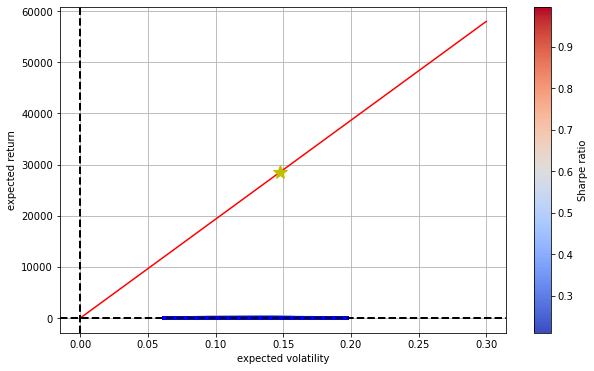

In [220]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=(prets - 0.01) / pvols,
            marker='.', cmap='coolwarm')
plt.plot(evols, erets, 'b', lw=4.0)
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, 'r', lw=1.5)
plt.plot(opt[2], f(opt[2]), 'y*', markersize=15.0) 
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [221]:
cons = ({'type': 'eq', 'fun': lambda x:  port_ret(x) - f(opt[2])},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  
res = sco.minimize(port_vol, eweights, method='SLSQP',
                   bounds=bnds, constraints=cons)

In [222]:
res['x'].round(3)  

array([0.   , 0.029, 0.   , 0.   , 0.216, 0.   , 0.369, 0.   , 0.386,
       0.   ])

In [223]:
port_ret(res['x'])

0.09138953216373386

In [224]:
port_vol(res['x'])

0.07030871300818908

In [225]:
port_ret(res['x']) / port_vol(res['x'])

1.2998322434530898